# Probability and Statistics Programming

## Project Title: Demonstrate the Central Limit Theorem

### Objective: Reflecting the knowledge of sampling distribution

#### Tasks Recommended:
- A gray-scale image is a two-dimensional array of numbers, each of which represents the corresponding pixel intensity. You can obtain this array of numbers (i.e. image read) using various python packages.
- Consider the supplied "lena_gray.gif" gray-scale image as the population. Based on the population, you need to implement the following tasks

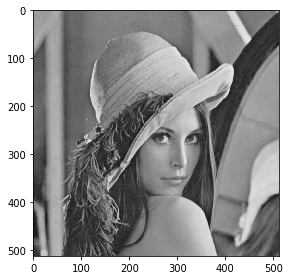

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from skimage import io

image = io.imread(fname='lena_gray.gif')
io.imshow(image)

#### TASK1
-  Find out the population size 𝑛, population mean (𝜇), population variance (𝜎^2), population range, minimum number, maximum number, population mode, and population median.

In [10]:
p_width = image.shape[0]
p_height = image.shape[1]
print("population size : %d * %d = %d" %(p_width, p_height, p_width*p_height))

re_img = image.reshape(-1) # Two-dimensional array to one dimension

p_mean = np.mean(re_img)
print("population mean :", p_mean)

p_var = np.var(re_img)
print("population variance :", p_var)

p_min = np.min(re_img)
print("minimum number :", p_min)

p_max = np.max(re_img)
print("maximum number :", p_max)
print("population range : %d ~ %d" %(p_min, p_max))

p_mode = sp.mode(re_img)[0][0]
print("population mode :", p_mode)

p_median = np.median(image)
print("population median :", p_median)

population size : 512 * 512 = 262144
population mean : 124.05046081542969
population variance : 2289.9760151074734
minimum number : 25
maximum number : 245
population range : 25 ~ 245
population mode : 154
population median : 129.0


#### TASK2
- Find out the histogram of the population. Comment on the population distribution.

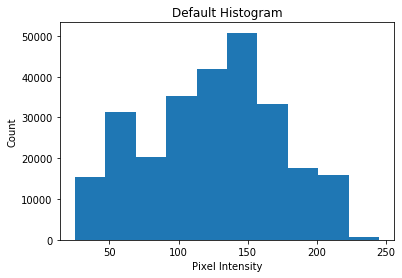

In [11]:
# to draw histogram
re_img = np.sort(re_img) # sort array

plt.title("Default Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.hist(re_img)
plt.show()

#### TASK3
- Investigate the histogram by changing the number of bins to 10, 100, and 1,000. Provide your observations.

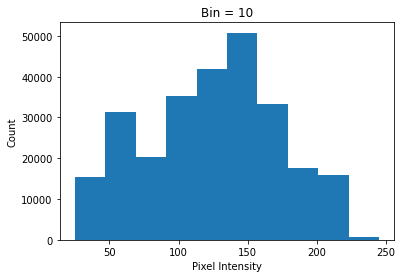

In [155]:
plt.title("Bin = 10")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.hist(re_img, bins=10)
plt.show()

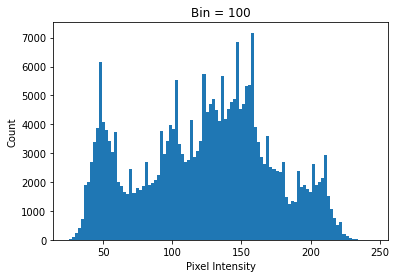

In [142]:
plt.title("Bin = 100")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.hist(re_img, bins=100)
plt.show()

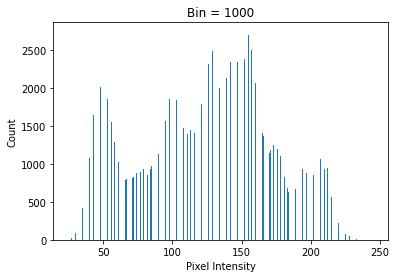

In [143]:
plt.title("Bin = 1000")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.hist(re_img, bins=1000)
plt.show()

#### TASK4
- Demonstrate the central limit theorem (i.e., the distribution of the sampling mean will approach towards the normal distribution with the mean 𝜇 and variance 𝜎^2/𝑛 as the sample size increases). Recommended sample sizes are 5, 10, 20, 30, 50, 100. In addition to any content that you think appropriate for this demonstration, you will include various graphical representations such as the respective histogram for each sample size.

In [12]:
def getMeanFromPopulation (population, size):
  arr = []
  for i in range(size):
    idx = np.random.randint(0, 512*512)
    arr.append(population[idx])

  mean = np.mean(arr)
  return mean

In [13]:
def getArrMean (iter, population, size):
  arr = []
  for i in range(iter):
    mean = getMeanFromPopulation(population, size)
    arr.append(mean)
  return arr

In [14]:
NUM_ITERATION = 50000 # poximitly infinte

In [19]:
def drawGraph (data, SAMPLE_SIZE):
  s_sd = (p_var/SAMPLE_SIZE)**0.5

  x = np.linspace(p_mean-s_sd*3, p_mean+s_sd*3, 1024)
  x = np.sort(x)
  y = sp.norm.pdf(x, loc=p_mean, scale=s_sd)


  plt.hist(data, bins=100, density=True)
  plt.plot(x, y)
  plt.show()

  s_mean = np.mean(data)
  print("Population mean = ", p_mean)
  print("Sampling mean = ", s_mean)
  print("Distance = ", p_mean - s_mean)

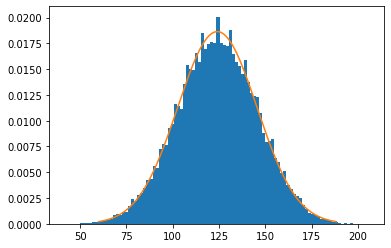

Population mean =  124.05046081542969
Sampling mean =  124.05310399999999
Distance =  -0.002643184570302992


In [20]:
SAMPLE_SIZE = 5
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)

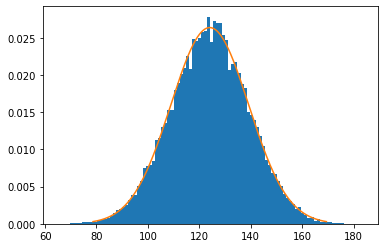

Population mean =  124.05046081542969
Sampling mean =  124.066902
Distance =  -0.016441184570311407


In [149]:
SAMPLE_SIZE = 10
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)

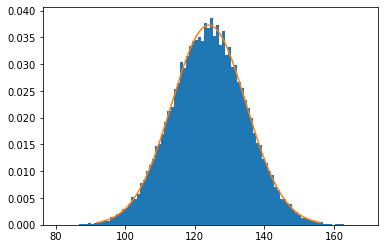

Population mean =  124.05046081542969
Sampling mean =  124.02266399999999
Distance =  0.027796815429695698


In [150]:
SAMPLE_SIZE = 20
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)

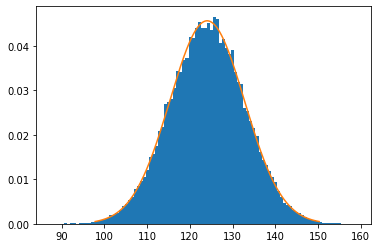

Population mean =  124.05046081542969
Sampling mean =  124.08521666666665
Distance =  -0.034755851236965896


In [151]:
SAMPLE_SIZE = 30
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)

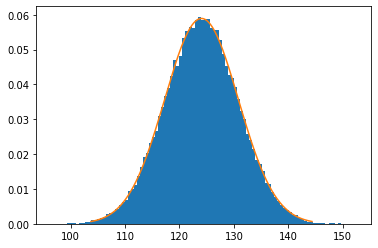

Population mean =  124.05046081542969
Sampling mean =  124.0222348
Distance =  0.02822601542968073


In [136]:
SAMPLE_SIZE = 50
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)

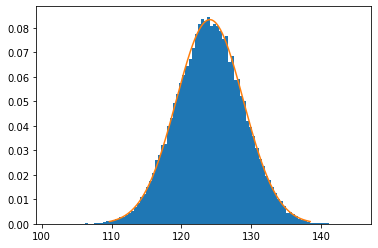

Population mean =  124.05046081542969
Sampling mean =  124.04069439999999
Distance =  0.00976641542969503


In [137]:
SAMPLE_SIZE = 100
data = getArrMean (NUM_ITERATION, re_img, SAMPLE_SIZE)

drawGraph(data, SAMPLE_SIZE)